In [4]:
with open("robot_gpu_lib_version.txt", "w") as f:
    f.write("# conda install -c conda-forge cudatoolkit=11.2 cudnn=8.1\n")
    f.write("pip install tensorflow==2.10\n")
    f.write('pip install "numpy<2"\n')
    f.write('pip install "pandas<2.2.2"\n')
    f.write('pip install "matplotlib<3.9"\n')

In [ ]:
# 나중 새로운 가상환경에서
# pip install -r robot_gpu_lib_version.txt

In [1]:
print("Hello World!")
# 실행했을 때
# 뜨는 팝업에서 "설치" 클릭

In [2]:
print("Finished")

In [1]:
import tensorflow as tf
print(tf.config.list_physical_devices("GPU"))
device = tf.config.experimental.list_physical_devices("GPU")
if device:
    try:
        tf.config.experimental.set_memory_growth(device[0], True)
        print("VRAM 12GB 메모리 제한 완료")
    except:
        print("GPU 없음")

In [2]:
%pip install "pandas<2.2.2"

In [2]:
%pip install "matplotlib<3.9"

In [1]:
# 세 번째 딥러닝
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

import pandas as pd
df = pd.read_csv("train.csv")
df_tt = df[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]].copy()

# 1) 전처리 : 결측치(NaN) dropna
df_tt = df_tt.dropna()
# 2) 범주형 데이터인 Sex -> One-Hot Encoding (hint : pd.get_dummies() 활용)
df_tt = pd.get_dummies(df_tt, dtype=int)
# 3) X, y를 iloc 슬라이싱
# -> y : Survived, X : 나머지 컬럼
X = df_tt.iloc[:, 1:]
y = df_tt.iloc[:, 0]
# 4) Sequential() 통해 층을 쌓을 model 인스턴스 만들기
model = Sequential()
# 5) Dense()를 통해 원하는 만큼 층 쌓기
model.add(Dense(30, input_dim=7, activation="relu"))  # 1층
model.add(Dense(20, input_dim=30, activation="relu")) # 2층
model.add(Dense(10, input_dim=20, activation="relu"))
# 6) 단, 마지막 층은 output 1, 활성화 함수 sigmoid로 해주세요
model.add(Dense(1, input_dim=10, activation="sigmoid"))
# 7) 생존 혹은 사망 -> 이항분류(binary_crossentropy) 학습
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# 8) epochs, batch_size 원하는 만큼 파라미터 설정
# 9) 학습!!
history = model.fit(X, y, epochs=100, batch_size=16, verbose=False)
# 10) 정확도도 확인해보세요
max(history.history["accuracy"])

In [2]:
%pip install "scikit-learn==1.7.2"

In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_iris

iris_data = load_iris()
X = iris_data.data
y = iris_data.target

import pandas as pd
y = pd.get_dummies(y, dtype=int)

model = Sequential()
model.add(Dense(12, input_dim=4, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(3, activation="softmax")) # 마지막 출력층 노드가 3개다! (클래스가 3개니까)
# model.summary() # 모델 파라미터 등 확인

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# batch_size가 16개라면
# 현재 X에 있는 150개 데이터를 16개 단위로 끊어
# 학습 후 가중치를 오차에 역전파(back-propagation) 형태로 갱신
model.fit(X, y, epochs=1000, batch_size=64)


In [21]:
import numpy as np
mine = np.loadtxt("https://github.com/nayeho/robot/raw/refs/heads/main/data/sonar3.csv", delimiter=",")
mine.shape # 0 ~ 59가 feature, 60 : class
X = mine[:, :60]
y = mine[:, 60] # 광석이면 1, 일반 암석이면 0

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)

# 마지막 출력층 : 1 -> sigmoid
# compile 옵션에 loss : binary_crossentropy
# 자유롭게 학습해서 
# accuracy 출력!

model = Sequential()
model.add(Dense(24, input_dim=60, activation="relu"))
model.add(Dense(12, input_dim=24, activation="relu"))
model.add(Dense(8, input_dim=12, activation="relu"))
model.add(Dense(1, input_dim=8, activation="sigmoid")) # 마지막 출력층 노드가 3개다! (클래스가 3개니까)
# model.summary() # 모델 파라미터 등 확인

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=200, batch_size=1)
score = model(X_test, y_test) 

# 100%니까 나는 짱 좋은 모델을 만들었다!!
# overfitting -> train, test split
# train과 test를 분리하자!

Epoch 1/200
156/156 [==============================] - 1s 3ms/step - loss: 0.6989 - accuracy: 0.5064
Epoch 2/200
156/156 [==============================] - 0s 2ms/step - loss: 0.6827 - accuracy: 0.5192
Epoch 3/200
156/156 [==============================] - 0s 2ms/step - loss: 0.6595 - accuracy: 0.6026
Epoch 4/200
156/156 [==============================] - 0s 2ms/step - loss: 0.6375 - accuracy: 0.6859
Epoch 5/200
156/156 [==============================] - 0s 2ms/step - loss: 0.5969 - accuracy: 0.7244
Epoch 6/200
156/156 [==============================] - 0s 2ms/step - loss: 0.5457 - accuracy: 0.7821
Epoch 7/200
156/156 [==============================] - 0s 2ms/step - loss: 0.5128 - accuracy: 0.7564
Epoch 8/200
156/156 [==============================] - 0s 2ms/step - loss: 0.4921 - accuracy: 0.7949
Epoch 9/200
156/156 [==============================] - 0s 2ms/step - loss: 0.4571 - accuracy: 0.8269
Epoch 10/200
156/156 [==============================] - 0s 2ms/step - loss: 0.4291 - accura

In [6]:
# 모델 저장 및 불러오기
# 모델을 저장하는 폴더를 만들자
import os
if not os.path.exists("models"):
    os.mkdir("models")
    print("폴더 생성 완료")
else:
    print("폴더가 이미 존재합니다")

In [8]:
# 모델 저장
model.save("models/mine_200.keras")

In [9]:
# 모델 불러오기
from tensorflow.keras.models import load_model
model2 = load_model("models/mine_200.keras")
model2.evaluate(X_test, y_test)

In [23]:
# k겹 교차 검증
from sklearn.model_selection import KFold
k = 5 # 데이터를 5분할하여 train, test를 5번 실행!
kfold = KFold(n_splits=k, shuffle=True)
acc_list = [] # 5개의 평가지표(정확도)를 담는 리스트!

import numpy as np
mine = np.loadtxt("https://github.com/nayeho/robot/raw/refs/heads/main/data/sonar3.csv", delimiter=",")

mine.shape # 0 ~ 59가 feature, 60 : class
X = mine[:, :60]
y = mine[:, 60] # 광석이면 1, 일반 암석이면 0

model = Sequential()
model.add(Dense(24, input_dim=60, activation="relu"))
model.add(Dense(12, input_dim=24, activation="relu"))
model.add(Dense(8, input_dim=12, activation="relu"))
model.add(Dense(1, input_dim=8, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index, :], X[test_index, :]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=False)
    score = model.evaluate(X_test, y_test)
    acc_list.append(score[1]) # 정확도

print(f"5겹 교차 검증 정확도 : {np.average(acc_list)}")

2/2 [==============================] - 0s 2ms/step - loss: 0.0201 - accuracy: 1.0000
5겹 교차 검증 정확도 : 0.9189314723014832


In [24]:
!curl -L https://github.com/nayeho/robot/raw/refs/heads/main/data/wine.csv -o wine.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  352k  100  352k    0     0   925k      0 --:--:-- --:--:-- --:--:-- 17.2M


In [29]:
df_wine = pd.read_csv("wine.csv", names=list(range(13)))
df_wine.iloc[:, 12].value_counts()
# wine 1 : red wine, 0 : white wine
# 검증 데이터셋 (validation)

X = df_wine.iloc[:, :12]
y = df_wine.iloc[:, 12]
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
model = Sequential()
model = Sequential(Dense(24, input_dim=12, activation="relu"))
model = Sequential(Dense(12, input_dim=24, activation="relu"))
model = Sequential(Dense(1, input_dim=12, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# 검증 데이터셋 : 0.25
# 학습 0.75 : 검증 0.25
# 총 학습 0.6 : 검증 0.2 : 테스트 0.2
model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=False, validation_split=0.25)

(6497, 12) (6497,)


In [30]:
score = model.evaluate(X_test, y_test)
score

41/41 [==============================] - 0s 2ms/step - loss: 0.1188 - accuracy: 0.9608


[0.11881501227617264, 0.9607692360877991]

In [ ]:
# 중간에 학습 100번 중에 진짜 괜찮은 순간
# 그 때, 모델을 저장해보자
from tensorflow.keras.callbacks import ModelCheckpoint
check = ModelCheckpoint(filepath="models", verbose=True)
model.fit(X_train, y_train, epochs=100, batch_size=64,
           verbose=False, validation_split=0.25, callbacks=[check])


Epoch 1: saving model to models
INFO:tensorflow:Assets written to: models\assets

Epoch 2: saving model to models
INFO:tensorflow:Assets written to: models\assets

Epoch 3: saving model to models
INFO:tensorflow:Assets written to: models\assets

Epoch 4: saving model to models
INFO:tensorflow:Assets written to: models\assets

Epoch 5: saving model to models
INFO:tensorflow:Assets written to: models\assets

Epoch 6: saving model to models
INFO:tensorflow:Assets written to: models\assets

Epoch 7: saving model to models
INFO:tensorflow:Assets written to: models\assets

Epoch 8: saving model to models
INFO:tensorflow:Assets written to: models\assets

Epoch 9: saving model to models
INFO:tensorflow:Assets written to: models\assets

Epoch 10: saving model to models
INFO:tensorflow:Assets written to: models\assets

Epoch 11: saving model to models
INFO:tensorflow:Assets written to: models\assets

Epoch 12: saving model to models
INFO:tensorflow:Assets written to: models\assets

Epoch 13: sa

In [32]:
# 지금까지 배웠던 내용 토대로
!curl -L https://github.com/nayeho/robot/raw/refs/heads/main/data/house_train.csv -o house.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

100  449k  100  449k    0     0  4414k      0 --:--:-- --:--:-- --:--:-- 4414k


In [ ]:
df_house = pd.read_csv("house.csv")
# DataFrame의 빈 데이터
# isnull() : 비어 있으면 True
# sum() : 비어 있는 개수를 총합
# sort_values() : 정렬
# ascending=False : 내림차순 => 오름차순에 False
# 출력결과가 생략되니 head()를 통해서 정말 몇 개 결측인지 확인
df_house.isnull().sum().sort_values(ascending=False).head(20)

# One-Hot Encoding
df_house = pd.get_dummies(df_house, dtype=int)

# df_house.dropna() => 결측치 전체 없앰
# 결측치 채워보자 : 평균으로 채워보자
df_house.fillna(df_house.mean())

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=289)

In [55]:
# 288개의 feature, 1개 정답(SalePrice)
# 상관계수 확인!!
df_corr = df_house.corr()
df_corr.sort_values("SalePrice", ascending=False)["SalePrice"].head(10)

X = df_house[["OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF"]]
y = df_house["SalePrice"]
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

model = Sequential()
# 여러분들 자유롭게 적층!!
model.add(Dense(20, input_dim=5, activation="relu"))
model.add(Dense(12, input_dim=20, activation="relu"))
model.add(Dense(8, input_dim=12, activation="relu"))
# 분류가 아니다!! 회귀(주택 가격)
model.add(Dense(1)) # 마지막 출력층
model.compile(optimizer="adam", loss="mean_squared_error")
model.fit(X_train, y_train, epochs=100, batch_size=64
          , validation_split=0.25, verbose=False)

(1460, 5) (1460,)


In [56]:
score = model.evaluate(X_test, y_test)
np.sqrt(score) # rmse : 43867

10/10 [==============================] - 0s 2ms/step - loss: 1918520576.0000


43800.919807693535

1


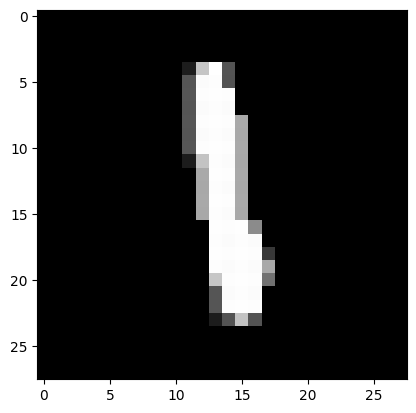

In [ ]:
# 로봇 비전 프로젝트
# CNN
# 이제 시각적 -> 조금 재밌을지도
from tensorflow.keras.datasets import mnist
data = mnist.load_data()
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

import matplotlib.pyplot as plt
plt.imshow(X_train[200], cmap="gray")   # cmap="binaru" 혹은 cmap="gray"
print(y_train[200])
plt.show()

In [ ]:
# 컴퓨터가 이해하는 방식으로 출력
for x in X_train[0]:
    for i in x:
        print(f"{i:3d}", end=" ")
    print()

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0 

In [93]:
del (X_train, y_train), (X_test, y_test)

from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# (28, 28) -> reshape 차원을 1차원으로 낮추기
# CNN시 1차원으로 낮추지 말자!
# X_train = X_train.reshape(X_train.shape[0], 784)
# X_test = X_test.reshape(X_test.shape[0], 784)

# 전체를 0 ~ 255 -> 0 ~ 1
X_train = X_train.astype("float64") / 255
X_test = X_test.astype("float64") / 255
X_train[0] = X_train[0].astype("float64") / 255 

from keras import utils
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

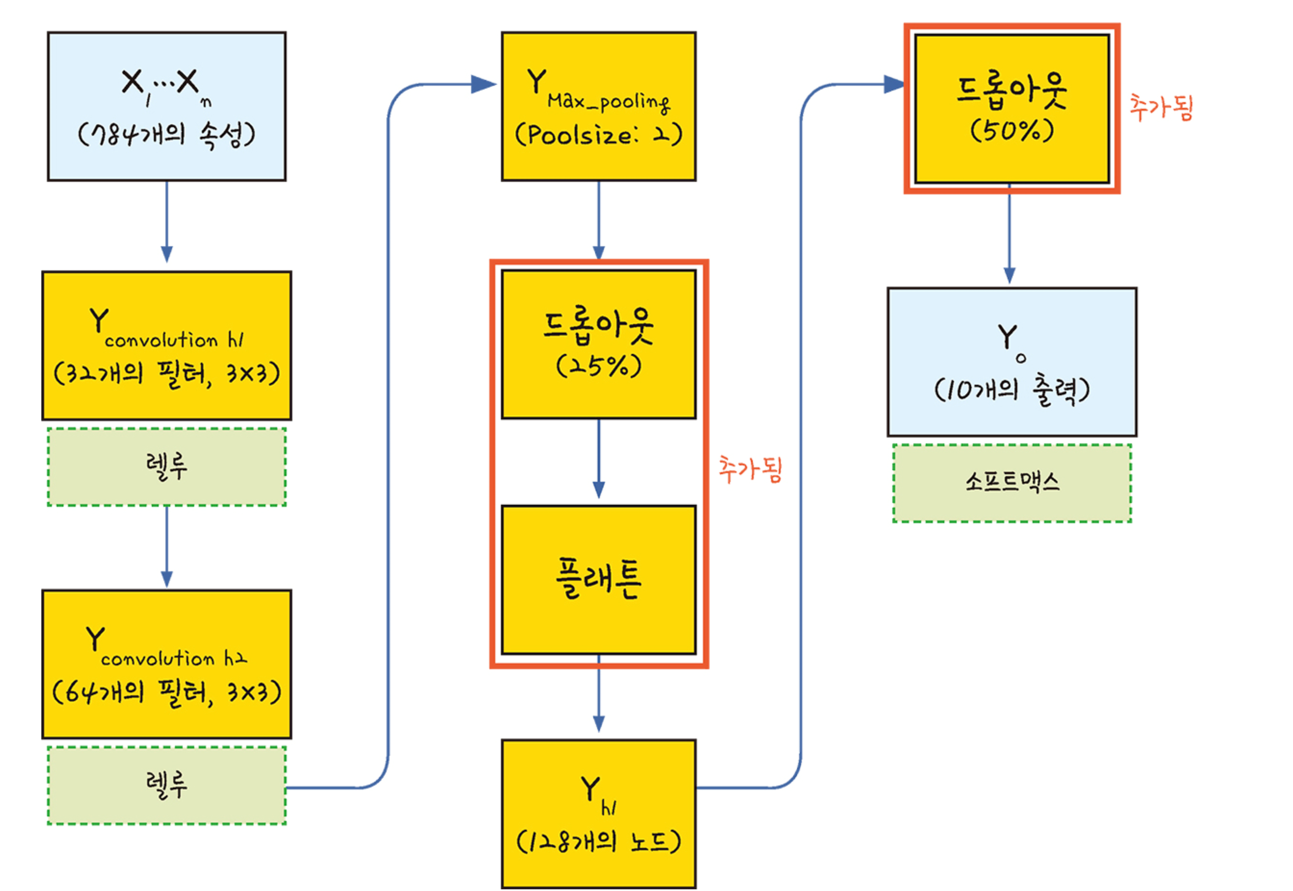

In [95]:
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dropout
model = Sequential()
# 각 이미지가 28 x 28 -> 784로 평탄화
# 1층 : 784 입력 -> 512개의 노드, 활성화 함수 relu
# 출력층 : softmax 10개의 클래스에 대한 확률
# Conv2D(필터계수(마치 like Node), kernel_size(3, 3), input_shape=(28, 28, 흑백은 1 컬러는 3), activation="relu")
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(54, kernel_size=(3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))   # 2 x 2 영역에서 가장 큰 값만 추출
model.add(Dropout(0.25)) # 25% 노드(필터) 끄자
model.add(Flatten())    # 2차원 이상의 데이터 -> 1차원으로 바꾸는 기능 (평탄화)
model.add(Dense(128, input_dim=784, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

# 학습 할 모델을 설계
# 모델을 설계하기 싫어요 -> 만들어진 모델을 쓰자 (YOLO)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(X_train, y_train, epochs=100, batch_size=256, validation_split=0.25)
# 노드, 가중치 정답에 가까워지는 규칙

# 이미지 데이터 -> CNN
# Dense -> ANN (인공 지능망)
# (28 x 28) -> CNN (합성곱 신경망)

Epoch 1/100
176/176 [==============================] - 2s 7ms/step - loss: 0.3823 - accuracy: 0.8815 - val_loss: 0.0944 - val_accuracy: 0.9719
Epoch 2/100
176/176 [==============================] - 1s 6ms/step - loss: 0.1170 - accuracy: 0.9637 - val_loss: 0.0614 - val_accuracy: 0.9819
Epoch 3/100
176/176 [==============================] - 1s 6ms/step - loss: 0.0859 - accuracy: 0.9746 - val_loss: 0.0497 - val_accuracy: 0.9848
Epoch 4/100
176/176 [==============================] - 1s 6ms/step - loss: 0.0672 - accuracy: 0.9791 - val_loss: 0.0509 - val_accuracy: 0.9841
Epoch 5/100
176/176 [==============================] - 1s 6ms/step - loss: 0.0564 - accuracy: 0.9836 - val_loss: 0.0465 - val_accuracy: 0.9856
Epoch 6/100
176/176 [==============================] - 1s 6ms/step - loss: 0.0496 - accuracy: 0.9848 - val_loss: 0.0415 - val_accuracy: 0.9875
Epoch 7/100
176/176 [==============================] - 1s 6ms/step - loss: 0.0445 - accuracy: 0.9863 - val_loss: 0.0434 - val_accuracy: 0.9877

In [ ]:
score = model.evaluate(X_test, y_test)
score

# 웹캠 (혹은 쓴 손 글씨) -> 28x28로 처리 0 ~ 1 -> 숫자 5야

313/313 [==============================] - 1s 2ms/step - loss: 0.1465 - accuracy: 0.9843


[0.14649806916713715, 0.9843000173568726]

In [97]:
# YOLO (You Only Look Once)
# 이미 만들어진 모델
# 가져다 쓰자!

!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [102]:
!python yolov5/detect.py

Traceback (most recent call last):
  File "c:\Users\kccistc\Desktop\workspace\yolov5\detect.py", line 38, in <module>
    import torch
ModuleNotFoundError: No module named 'torch'


In [101]:
import os
os.listdir("yolov5")

import glob
glob.glob("yolov5/*.py")


['yolov5\\benchmarks.py',
 'yolov5\\detect.py',
 'yolov5\\export.py',
 'yolov5\\hubconf.py',
 'yolov5\\train.py',
 'yolov5\\val.py']